**3.	Implement image classification with CNN model, using one of the below datasets:**

https://www.kaggle.com/slothkong/10-monkey-species
     
https://www.kaggle.com/prasunroy/natural-images

a.	Report your classification result with and without doing scaling

b.	Save the model and then predict on one of the test data. Report the prediction and check if it has been predicted correctly or not


In [ ]:
#Importing required packages  

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt. 

import os, cv2, random, scipy, math

from random import shuffle       
           
from PIL import Image

from pathlib import Path

from sklearn import preprocessing
from sklearn import metrics

from sklearn.model_selection import train_test_split

import keras

from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.text import Tokenizer

from keras.models import Sequential
from keras.models import load_model

from keras import layers

from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, Embedding

from keras.callbacks import ModelCheckpoint, EarlyStopping

np.random.seed(37)

Using TensorFlow backend.


In [ ]:
from google.colab import drive
drive.mount('/content/drive', )

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_dir = Path('/content/drive/My Drive/Colab Notebooks/monkey_datastet/training/training/')
test_dir = Path('/content/drive/My Drive/Colab Notebooks/monkey_datastet/validation/validation/')

In [ ]:
#label info
cols = ['Label','Latin Name', 'Common Name','Train Images', 'Validation Images']
labels = pd.read_csv("/content/drive/My Drive/Colab Notebooks/monkey_datastet/monkey_labels.txt", names=cols, skiprows=1)
labels

,Label,Latin Name,Common Name,Train Images,Validation Images
0,n0,alouatta_palliata\t,mantled_howler,131,26
1,n1,erythrocebus_patas\t,patas_monkey,139,28
2,n2,cacajao_calvus\t,bald_uakari,137,27
3,n3,macaca_fuscata\t,japanese_macaque,152,30
4,n4,cebuella_pygmea\t,pygmy_marmoset,131,26
5,n5,cebus_capucinus\t,white_headed_capuchin,141,28
6,n6,mico_argentatus\t,silvery_marmoset,132,26
7,n7,saimiri_sciureus\t,common_squirrel_monkey,142,28
8,n8,aotus_nigriceps\t,black_headed_night_monkey,133,27
9,n9,trachypithecus_johnii,nilgiri_langur,132,26


In [ ]:
labels = labels['Common Name']
labels

0     mantled_howler                
1     patas_monkey                  
2     bald_uakari                   
3     japanese_macaque              
4     pygmy_marmoset                
5     white_headed_capuchin         
6     silvery_marmoset              
7     common_squirrel_monkey        
8     black_headed_night_monkey     
9     nilgiri_langur                
Name: Common Name, dtype: object

In [ ]:
def image_show(num_image,label):
    for i in range(num_image):
        imgdir = Path('/content/drive/My Drive/Colab Notebooks/monkey_datastet/training/training/' + label)
        print(imgdir)
        imgfile = random.choice(os.listdir(imgdir))
        #print(imgfile)
        img = cv2.imread('/content/drive/My Drive/Colab Notebooks/monkey_datastet/training/training/'+ label +'/'+ imgfile)
       # print(img.shape)
        #print(label)
        plt.figure(i)
        plt.imshow(img)
        plt.title(imgfile)
    plt.show()

 pygmy_marmoset                
/content/drive/My Drive/Colab Notebooks/monkey_datastet/training/training/n4
/content/drive/My Drive/Colab Notebooks/monkey_datastet/training/training/n4
/content/drive/My Drive/Colab Notebooks/monkey_datastet/training/training/n4


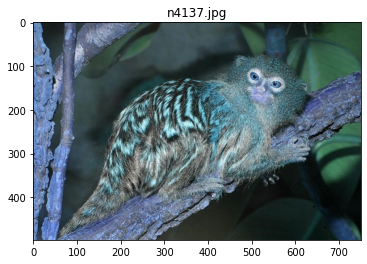

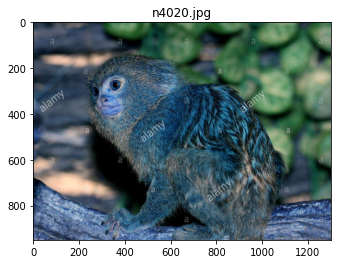

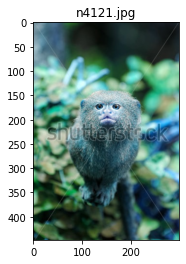

In [ ]:
print(labels[4])
image_show(3,'n4')

**a.	Report your classification result with and without doing scaling**

In [ ]:
# LR = 1e-3
height=150
width=150
channels=3
seed=1337
batch_size = 128
num_classes = 10
epochs = 30
data_augmentation = True
num_predictions = 20

# Training generator
train_datagen = ImageDataGenerator(
        rescale=1./255)
        

train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    target_size=(height,width),
                                                    batch_size=batch_size,
                                                    seed=seed,
                                                    # shuffle=True,
                                                    class_mode='categorical')

# Test generator
test_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = test_datagen.flow_from_directory(test_dir, 
                                                  target_size=(height,width), 
                                                  batch_size=batch_size,
                                                  seed=seed,
                                                  #  shuffle=False,
                                                  class_mode='categorical')

train_num = train_generator.samples
validation_num = validation_generator.samples

Found 1098 images belonging to 10 classes.
Found 272 images belonging to 10 classes.


In [ ]:
validation_generator

In [ ]:
validation_num

272

In [ ]:
model = Sequential() #sequential Neural Network
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3))) #2D CNN
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5)) #drop out 50%
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) #compiling the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 36, 36, 64)       

In [ ]:
filepath=str(os.getcwd()+"/model.h5f") #Saving the model

checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
# = EarlyStopping(monitor='val_acc', patience=15)
callbacks_list = [checkpoint]#, stopper]

In [ ]:
filepath

'/content/model.h5f'

In [ ]:
history = model.fit_generator(train_generator,
                              steps_per_epoch= train_num // batch_size,
                              epochs=epochs,
                              validation_data=train_generator,
                              validation_steps= validation_num // batch_size,
                              callbacks=callbacks_list, 
                              verbose = 1
                             ) #fitting the model

Epoch 1/30
8/8 [==============================] - 85s 11s/step - loss: 2.3073 - accuracy: 0.1134 - val_loss: 2.2146 - val_accuracy: 0.1680

Epoch 00001: val_accuracy improved from -inf to 0.16797, saving model to /content/model.h5f
Epoch 2/30
8/8 [==============================] - 60s 8s/step - loss: 2.1447 - accuracy: 0.2354 - val_loss: 1.8741 - val_accuracy: 0.3867

Epoch 00002: val_accuracy improved from 0.16797 to 0.38672, saving model to /content/model.h5f
Epoch 3/30
8/8 [==============================] - 54s 7s/step - loss: 1.9356 - accuracy: 0.3341 - val_loss: 1.8143 - val_accuracy: 0.4609

Epoch 00003: val_accuracy improved from 0.38672 to 0.46094, saving model to /content/model.h5f
Epoch 4/30
8/8 [==============================] - 57s 7s/step - loss: 1.6382 - accuracy: 0.4588 - val_loss: 1.2673 - val_accuracy: 0.6250

Epoch 00004: val_accuracy improved from 0.46094 to 0.62500, saving model to /content/model.h5f
Epoch 5/30
8/8 [==============================] - 65s 8s/step - lo

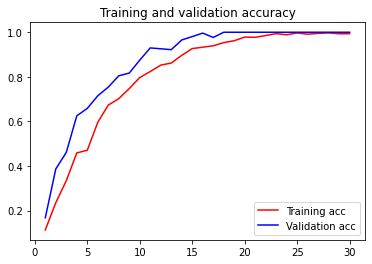

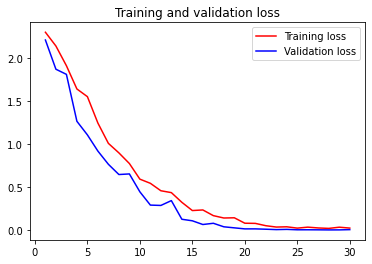

In [ ]:
#Accuracy Loss from history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()

In [ ]:
# LR = 1e-3
height=150
width=150
channels=3
seed=1337
batch_size = 128
num_classes = 10
epochs = 30
data_augmentation = True
num_predictions = 20

# Training generator
train_datagen_withoutscal = ImageDataGenerator()
     

train_generator_withoutscal = train_datagen_withoutscal.flow_from_directory(train_dir, 
                                                    target_size=(height,width),
                                                    batch_size=batch_size,
                                                    seed=seed,
                                                    # shuffle=False,
                                                    class_mode='categorical')

# Test generator
test_datagen_withoutscal = ImageDataGenerator()
validation_generator_withoutscal = test_datagen_withoutscal.flow_from_directory(test_dir, 
                                                  target_size=(height,width), 
                                                  batch_size=batch_size,
                                                  seed=seed,
                                                  # shuffle=False,
                                                  class_mode='categorical')

train_num_withoutscal = train_generator_withoutscal.samples
validation_num_withoutscal = validation_generator_withoutscal.samples

Found 1098 images belonging to 10 classes.
Found 272 images belonging to 10 classes.


In [ ]:
model_withoutscal = Sequential() #Sequential Neural Network
model_withoutscal.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3))) #2D CNN
model_withoutscal.add(Activation('relu'))
model_withoutscal.add(MaxPooling2D(pool_size=(2, 2)))

model_withoutscal.add(Conv2D(32, (3, 3)))
model_withoutscal.add(Activation('relu'))
model_withoutscal.add(MaxPooling2D(pool_size=(2, 2)))

model_withoutscal.add(Conv2D(64, (3, 3), padding='same')) #2D CNN
model_withoutscal.add(Activation('relu'))
model_withoutscal.add(Conv2D(64, (3, 3)))
model_withoutscal.add(Activation('relu'))
model_withoutscal.add(MaxPooling2D(pool_size=(2, 2)))
model_withoutscal.add(Dropout(0.25))

model_withoutscal.add(Flatten())
model_withoutscal.add(Dense(512))
model_withoutscal.add(Activation('relu'))
model_withoutscal.add(Dropout(0.5)) #Drop out 50%
model_withoutscal.add(Dense(num_classes))
model_withoutscal.add(Activation('softmax'))

In [ ]:
model_withoutscal.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) #compiling the model
model_withoutscal.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_7 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_8 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 36, 36, 64)       

In [ ]:
filepath_withoutscal=str(os.getcwd()+"/model_noscale.h5f") #saving the model
checkpoint_withoutscal = ModelCheckpoint(filepath_withoutscal, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
# = EarlyStopping(monitor='val_acc', patience=15)
callbacks_list_withoutscal = [checkpoint_withoutscal]#, stopper]

In [ ]:
history_noscale = model.fit_generator(train_generator,
                              steps_per_epoch= train_num // batch_size,
                              epochs=epochs,
                              validation_data=train_generator,
                              validation_steps= validation_num // batch_size,
                              callbacks=callbacks_list_withoutscal, 
                              verbose = 1
                             ) #fitting the model

Epoch 1/30
8/8 [==============================] - 85s 11s/step - loss: 0.0209 - accuracy: 0.9959 - val_loss: 8.3459e-04 - val_accuracy: 1.0000
Epoch 2/30


/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:707: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


8/8 [==============================] - 62s 8s/step - loss: 0.0183 - accuracy: 0.9941 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 3/30
8/8 [==============================] - 53s 7s/step - loss: 0.0237 - accuracy: 0.9934 - val_loss: 0.0036 - val_accuracy: 1.0000
Epoch 4/30
8/8 [==============================] - 60s 7s/step - loss: 0.0286 - accuracy: 0.9883 - val_loss: 0.0032 - val_accuracy: 1.0000
Epoch 5/30
8/8 [==============================] - 57s 7s/step - loss: 0.0309 - accuracy: 0.9902 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 6/30
8/8 [==============================] - 77s 10s/step - loss: 0.0383 - accuracy: 0.9863 - val_loss: 0.0040 - val_accuracy: 1.0000
Epoch 7/30
8/8 [==============================] - 55s 7s/step - loss: 0.0335 - accuracy: 0.9902 - val_loss: 0.0040 - val_accuracy: 1.0000
Epoch 8/30
8/8 [==============================] - 60s 8s/step - loss: 0.0200 - accuracy: 0.9961 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 9/30
8/8 [============================

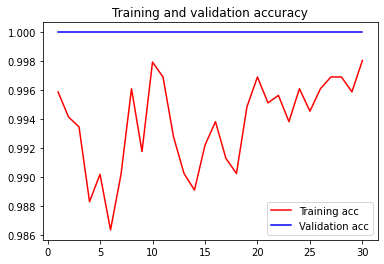

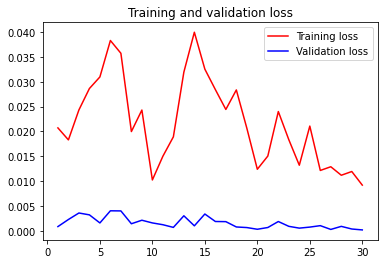

In [ ]:
#Accuracy Loss graph from history object
acc = history_noscale.history['accuracy']
val_acc = history_noscale.history['val_accuracy']
loss = history_noscale.history['loss']
val_loss = history_noscale.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()

In [ ]:
model_trained = load_model(filepath)
# Predict the values from the validation dataset
Y_pred = model_trained.predict(validation_generator)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1)
y_true = validation_generator.classes

In [ ]:
print("Actual Value: ",y_true[0])

Actual Value:  0


In [ ]:
print("predicted value: ", Y_pred_classes[0])

predicted value:  1
